# Prediction of the electrical consumption needs of buildings

### Context of the problem

The project consists on creating data based strategies for the city of Seattle in the USA. To achieve the goal of a carbon-neutral city by 3050, the team is paying close attention to emissions from non-residential buildings. Consumption data can be downloaded at this address https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv.

Predictions will be based on the declarative data of the commercial operating permit (size and use of buildings, mention of recent work, date of construction, etc.) 
We are also interested to assess the value of the "ENERGY STAR Score" for predicting emissions, which is tedious to calculate with the approach currently used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

We have two data files corresponding to the years of 2015 and 2016. We will explore them:

### Description of 2015 data file:

In [2]:
data_file_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [3]:
print("The file contains {} rows and {} columns".format(data_file_2015.shape[0],data_file_2015.shape[1]))

The file contains 3340 rows and 47 columns


In [4]:
print(data_file_2015.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [5]:
data_file_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

### Description of 2016 data file:

In [6]:
data_file_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [7]:
print("The file contains {} rows and {} columns".format(data_file_2016.shape[0],data_file_2015.shape[1]))

The file contains 3376 rows and 47 columns


In [8]:
print(data_file_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [9]:
data_file_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### Comparison between 2015 and 2016 data files:

We will verify now if the data files from 2015 and 2016 have the same shape.

In [10]:
list_data_file_2015 = list(data_file_2015)
list_data_file_2016 = list(data_file_2016)

In [11]:
list_data_file_2016 == list_data_file_2015

False

The datafiles from years 2015 and 2016 are different. To verify which columns are different:

In [12]:
# Code extracted from https://stackoverflow.com/questions/50203732/compare-column-names-of-pandas-dataframe

def comparison_columns_data_files(data_file_A, data_file_B):
    data_file_A_column = data_file_A.columns
    data_file_B_column = data_file_B.columns

    common_columns = data_file_A_column.intersection(data_file_B_column) # common columns between data frames
    data_file_A_not_in_data_file_B = data_file_A_column.difference(data_file_B_column) # Columns that are in 2015 data file that are not in 2016 data file
    data_file_B_not_in_data_file_A = data_file_B_column.difference(data_file_A_column) # Columns that are in 2016 data file that are not in 2015 data file

    return (common_columns, data_file_A_not_in_data_file_B, data_file_B_not_in_data_file_A)

In [13]:
comparison_columns_data_files(data_file_2015, data_file_2016)

(Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
        'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
        'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
        'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
        'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
        'DefaultData', 'ComplianceStatus', 'Outlier'],
       dtype='object'),
 Index(['2010 Census Tracts', 'City Council Distr

We will have a look at the column 'Location' from the 2015 data file.

In [14]:
data_file_2015['Location']

0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
3       {'latitude': '47.61421585', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3340, dtype: object

As we observe from the 2015 data file, Location column contains information about the latitude and longitude coordinates, which are present as columns in the 2016 data file. We will separate the information contained in 'Location' column o obtain the latitude and longitude information in order to put it into two separate columns.

In [15]:
# See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning
import ast
data_file_2015['Location'] = [ast.literal_eval(str(item)) for index, item in data_file_2015.Location.iteritems()]
data_file_2015 = pd.concat([data_file_2015.drop(['Location'], axis=1), data_file_2015['Location'].apply(pd.Series)], axis=1)
data_file_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in data_file_2015.human_address.iteritems()]
data_file_2015 = pd.concat([data_file_2015.drop(['human_address'], axis=1), data_file_2015['human_address'].apply(pd.Series)], axis=1)
data_file_2015[['longitude', 'latitude']] = data_file_2015[['longitude', 'latitude']].apply(pd.to_numeric) 

In [16]:
data_file_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 52 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   CouncilDistrictCode                                            3340 non-null   int64  
 7   Neighborhood                                                

In [17]:
data_file_2015[['longitude', 'latitude']] = data_file_2015[['longitude', 'latitude']].apply(pd.to_numeric) 

### Revision of data files columns(variables)

As the mission of the project is regarding the CO2 emissions, we should pay special atention to the variables 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'GHGEmissionsIntensity' and 'TotalGHGEmissions'.

As described at https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy, we have:

* **The variable 'GHGEmissionsIntensity' or 'GHGEmissionsIntensity(kgCO2e/ft2)'**, is the total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources.

* **The variable 'TotalGHGEmissions' or 'GHGEmissions(MetricTonsCO2e)'**, is the total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

In [18]:
data_file_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [19]:
data_file_2016['TotalGHGEmissions'].describe()      

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [20]:
data_file_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [21]:
data_file_2016['GHGEmissionsIntensity'].describe()


count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

The variables 'GHGEmissionsIntensity(kgCO2e/ft2)' and 'GHGEmissionsIntensity' are of the same order of magnitud, as for the variables 'GHGEmissions(MetricTonsCO2e)' and 'TotalGHGEmissions'. We are going to rename these variables, plus the variables 'ZipCode' and 'Zip Codes', and we are going to use the variables names from the 2016 data file.

In [22]:
new_df_2015 = data_file_2015.copy()

In [23]:
new_df_2015 = new_df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                  'Zip Codes':'ZipCode',
                                  'latitude':'Latitude',
                                  'longitude':'Longitude',
                                  'address':'Address'})

In order to keep only the variables that we are going to use in further analyses, we will have a look first at the meaning of all the common variables of the 2015 and 2016 data files. As previously mentioned, the description of the variables is at https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy.
We will indicate here the variables relevant to our mission.

* **OSEBuildingID**: A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
* **DataYear**: Calendar year (January-December) represented by each data record.
* **BuildingType**: City of Seattle building type classification (e.g. Nonresidential, Multifamily).
* **PrimaryPropertyType**: The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
* **ZipCode, Latitude, Longitude and Address**: Property zip code, latitude and longitude coordinates, and physical address.
* **Neighborhood**: Property neighborhood area defined by the City of Seattle Department of Neighborhoods.
* **YearBuilt**: Year in which a property was constructed or underwent a complete renovation.
 

Regarding energy performance of buildings we have:

ENERGY STAR® is a joint program of the Environmental Protection Agency (EPA) and the Department of Energy (DOE). Its goal is to help consumers, businesses, and industry save money and protect the environment through the adoption of energy-efficient products and practices. (See ref. https://www.energy.gov/eere/buildings/energy-starr#:~:text=ENERGY%20STAR%C2%AE%20is%20a,energy%2Defficient%20products%20and%20practices).

Thus we have the following columns.

* **ENERGYSTARScore**: An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.
* **SiteEUI(kBtu/sf)**: Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
* **SourceEUI(kBtu/sf)**: Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
* **SiteEnergyUse(kBtu)**: The annual amount of energy consumed by the property from all sources of energy.


Other columns:

* **NumberofBuildings**: Number of buildings included in the property's report. In cases where a property is reporting as a campus, multiple buildings may be included in one report.
* **NumberofFloors**: Number of floors reported in Portfolio Manager.
* **PropertyGFATotal**: Total building and parking gross floor area.
* **PropertyGFABuilding(s)**: Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.

Generally, the gross floor area is the sum of the floor areas of the spaces within the building, including basements, mezzanine and intermediate-floored tiers, and penthouses with headroom height of 7.5 ft (2.2 meters) or greater.

We are starting te removal of some columns from the data files of 2015 and 2016 that we are not going to use in further analysis.

In [24]:
new_df_2015 = new_df_2015.drop(columns=['2010 Census Tracts', 'City Council Districts', 'Comment', 'OtherFuelUse(kBtu)', 'SPD Beats',
                                'Seattle Police Department Micro Community Policing Plan Areas', 'ZipCode', 'city', 'state', 'zip'])

In [25]:
new_df_2016 = data_file_2016.copy()

In [26]:
new_df_2016 = new_df_2016.drop(columns=['City', 'Comments', 'ZipCode', 'State'])

We will compare now if the two data frames have the same columns. If so, we will proceed to create a new data frame for each year with the variables that we will consider as relevant now based on the variables descriptions shown previously.

In [27]:
comparison_columns_data_files(new_df_2015,new_df_2016)

(Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
        'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
        'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
        'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
        'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
        'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData',
        'ComplianceStatus', 'Outlier', 'Latitude', 'Longitu

### Selection of relevant columns for the creation of new data frame with 2015 and 2016 data files

In [28]:
columns_for_analyses = ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'Latitude', 'Longitude', 'Address', 'Neighborhood', 'YearBuilt', 
                        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'NumberofBuildings', 'NumberofFloors',
                        'PropertyGFATotal', 'PropertyGFABuilding(s)', 'GHGEmissionsIntensity', 'TotalGHGEmissions']

In [29]:
new_data_frame_2015 = new_df_2015.copy()

In [30]:
data_subset_2015 = new_data_frame_2015[columns_for_analyses]

In [31]:
data_subset_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Latitude,Longitude,Address,Neighborhood,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions
0,1,2015,NonResidential,Hotel,47.612190,-122.337997,405 OLIVE WAY,DOWNTOWN,1927,65.0,78.9,173.5,6981428.0,1,12.0,88434,88434,2.64,249.43
1,2,2015,NonResidential,Hotel,47.613106,-122.333358,724 PINE ST,DOWNTOWN,1996,51.0,94.4,191.3,8354235.0,1,11.0,103566,88502,2.38,263.51
2,3,2015,NonResidential,Hotel,47.613349,-122.337699,1900 5TH AVE,DOWNTOWN,1969,18.0,96.6,242.7,73130656.0,1,41.0,961990,961990,1.92,2061.48
3,5,2015,NonResidential,Hotel,47.614216,-122.336609,620 STEWART ST,DOWNTOWN,1926,1.0,460.4,636.3,28229320.0,1,10.0,61320,61320,31.38,1936.34
4,8,2015,NonResidential,Hotel,47.613754,-122.340924,401 LENORA ST,DOWNTOWN,1980,67.0,120.1,228.8,14829099.0,1,18.0,119890,107430,4.02,507.70


In [32]:
new_data_frame_2016 = new_df_2016.copy()

In [33]:
data_subset_2016 = new_data_frame_2016[columns_for_analyses]

In [34]:
data_subset_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Latitude,Longitude,Address,Neighborhood,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions
0,1,2016,NonResidential,Hotel,47.61220,-122.33799,405 Olive way,DOWNTOWN,1927,60.0,81.699997,182.500000,7226362.5,1.0,12,88434,88434,2.83,249.98
1,2,2016,NonResidential,Hotel,47.61317,-122.33393,724 Pine street,DOWNTOWN,1996,61.0,94.800003,176.100006,8387933.0,1.0,11,103566,88502,2.86,295.86
2,3,2016,NonResidential,Hotel,47.61393,-122.33810,1900 5th Avenue,DOWNTOWN,1969,43.0,96.000000,241.899994,72587024.0,1.0,41,956110,759392,2.19,2089.28
3,5,2016,NonResidential,Hotel,47.61412,-122.33664,620 STEWART ST,DOWNTOWN,1926,56.0,110.800003,216.199997,6794584.0,1.0,10,61320,61320,4.67,286.43
4,8,2016,NonResidential,Hotel,47.61375,-122.34047,401 LENORA ST,DOWNTOWN,1980,75.0,114.800003,211.399994,14172606.0,1.0,18,175580,113580,2.88,505.01


### Revision of duplicated values data frame for 2015

We will check at the duplicate values by looking at the variable 'OSEBuildingID'.

In [35]:
print ("The number of duplicate values in the variable 'OSEBuildingID' of 2015 data frame is: {}".format(data_subset_2015.duplicated(subset=['OSEBuildingID']).sum()))

The number of duplicate values in the variable 'OSEBuildingID' of 2015 data frame is: 0


### Revision of duplicated values data frame for 2016

In [36]:
print ("The number of duplicate values in the variable 'OSEBuildingID' of 2016 data frame is: {}".format(data_subset_2016.duplicated(subset=['OSEBuildingID']).sum()))

The number of duplicate values in the variable 'OSEBuildingID' of 2016 data frame is: 0


### Creation of new data frame according to relevant variables

We will create now a new data frame that contains the union between 2015 and 2016 data, so that we can perform our analysis.

In [37]:
new_df_both_years = pd.concat([data_subset_2015[data_subset_2016.columns],data_subset_2016], axis = 0, ignore_index=True).sort_values(["DataYear", "OSEBuildingID"])

In [38]:
new_df_both_years.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Latitude,Longitude,Address,Neighborhood,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions
0,1,2015,NonResidential,Hotel,47.612190,-122.337997,405 OLIVE WAY,DOWNTOWN,1927,65.0,78.9,173.5,6981428.0,1.0,12.0,88434,88434,2.64,249.43
1,2,2015,NonResidential,Hotel,47.613106,-122.333358,724 PINE ST,DOWNTOWN,1996,51.0,94.4,191.3,8354235.0,1.0,11.0,103566,88502,2.38,263.51
2,3,2015,NonResidential,Hotel,47.613349,-122.337699,1900 5TH AVE,DOWNTOWN,1969,18.0,96.6,242.7,73130656.0,1.0,41.0,961990,961990,1.92,2061.48
3,5,2015,NonResidential,Hotel,47.614216,-122.336609,620 STEWART ST,DOWNTOWN,1926,1.0,460.4,636.3,28229320.0,1.0,10.0,61320,61320,31.38,1936.34
4,8,2015,NonResidential,Hotel,47.613754,-122.340924,401 LENORA ST,DOWNTOWN,1980,67.0,120.1,228.8,14829099.0,1.0,18.0,119890,107430,4.02,507.70


In [39]:
print("The data frame for both years with the relevant variables contains {} rows and {} columns".format(new_df_both_years.shape[0],new_df_both_years.shape[1]))

The data frame for both years with the relevant variables contains 6716 rows and 19 columns


## Cleaning the data

### Revision of missing values

We need to know how many columns have more than 40% of missing values.

In [40]:
nan_values = 100 * new_df_both_years.isna().sum() / len(new_df_both_years) 
print ("The number of columns whose missing values are bigger than 40% is: {}".format(len(nan_values[nan_values > 40])))

The number of columns whose missing values are bigger than 40% is: 0


The next function creates a graph that shows the NaN values in each column of the dataframe passed to the function.

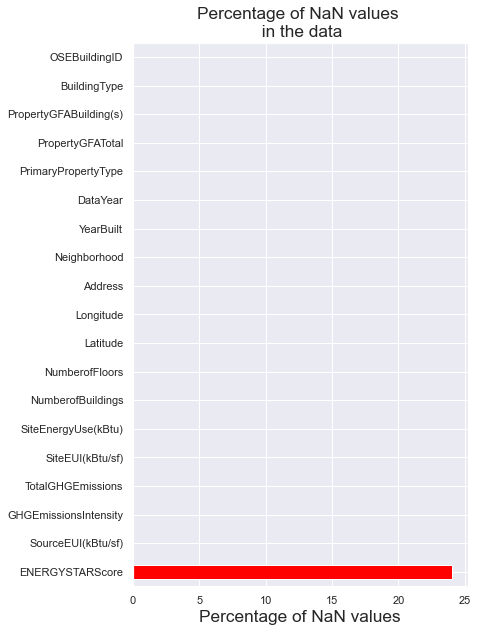

In [41]:
def graph_nan_values_per_column(data, size):

    nan_values = 100 * data.isna().sum() / len(data) 
    nan_values = nan_values.sort_values(ascending=False)
    nan_values = nan_values.astype(int)
    ax_nan_values = nan_values.plot(kind='barh', figsize=size, color='red')
    ax_nan_values.set_xlabel("Percentage of NaN values", fontsize='x-large')
    ax_nan_values.set_title("Percentage of NaN values \n in the data",fontsize='x-large')
graph_nan_values_per_column(new_df_both_years, (6,10))

In [42]:
new_df_both_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 6715
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           6716 non-null   int64  
 1   DataYear                6716 non-null   int64  
 2   BuildingType            6716 non-null   object 
 3   PrimaryPropertyType     6716 non-null   object 
 4   Latitude                6716 non-null   float64
 5   Longitude               6716 non-null   float64
 6   Address                 6716 non-null   object 
 7   Neighborhood            6716 non-null   object 
 8   YearBuilt               6716 non-null   int64  
 9   ENERGYSTARScore         5093 non-null   float64
 10  SiteEUI(kBtu/sf)        6699 non-null   float64
 11  SourceEUI(kBtu/sf)      6697 non-null   float64
 12  SiteEnergyUse(kBtu)     6701 non-null   float64
 13  NumberofBuildings       6708 non-null   float64
 14  NumberofFloors          6708 non-null   

### Exploratory analysis for data cleaning

Since we are mainly interested in the emissions of non-residential buildings, we are going to eliminate those values corresponding to residential buildings. For this we use the 'BuildingType' variable.

In [43]:
new_df_both_years['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [44]:
new_df_both_years = new_df_both_years[~new_df_both_years['BuildingType'].str.contains("Multifamily")]
new_df_both_years['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

With 'SPS-District K-12' being related to Seattle Public Schools.

<AxesSubplot:xlabel='count', ylabel='BuildingType'>

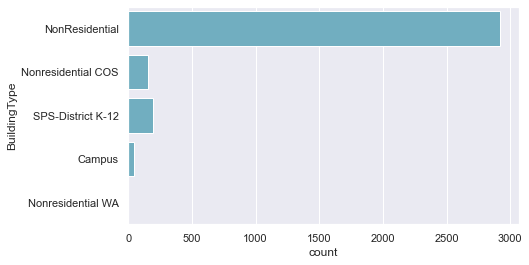

In [45]:
plt.subplots(figsize=(7, 4))
sns.countplot(y="BuildingType", data=new_df_both_years, color="c")

We are going to look at the 'PrimaryPropertyType'variable.

In [46]:
new_df_both_years['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Senior Care Community', 'Medical Office',
       'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'Restaurant\n', 'Low-Rise Multifamily',
       'Restaurant', 'University', 'Warehouse', 'Residence Hall',
       'Supermarket / Grocery Store', 'Office'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='PrimaryPropertyType'>

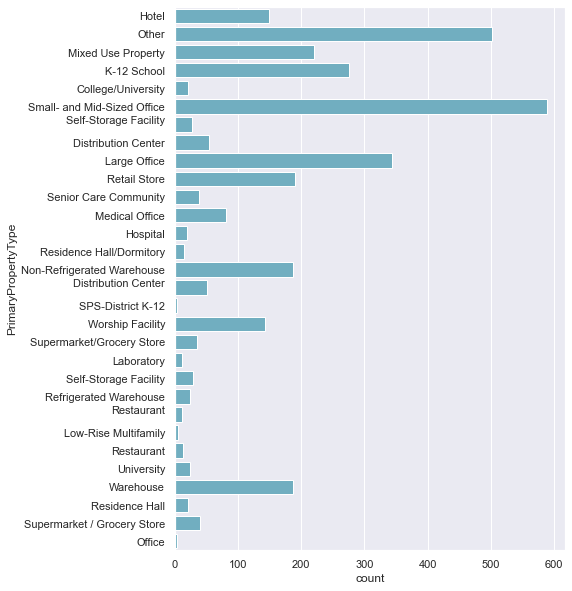

In [47]:
plt.subplots(figsize=(7, 10))
sns.countplot(y="PrimaryPropertyType", data=new_df_both_years, color="c")

We will look at the 'Neighborhood' column as well.

In [48]:
new_df_both_years['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

As we observed, 'DELRIDGE NEIGHBORHOODS' can be replaced with just 'DELRIDGE' denomination, so we keep unique values.

In [49]:
new_df_both_years['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
new_df_both_years['Neighborhood'] = new_df_both_years['Neighborhood'].map(lambda x: x.upper())

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

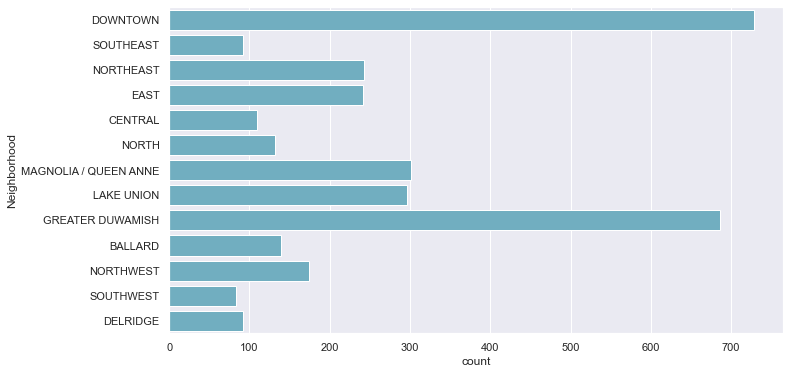

In [50]:
sns.countplot(y="Neighborhood", data=new_df_both_years, color="c")

In [51]:
new_df_both_years.describe()

,OSEBuildingID,DataYear,Latitude,Longitude,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions
count,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,2211.000000,3308.000000,3309.000000,3.309000e+03,3316.000000,3310.000000,3.318000e+03,3.318000e+03,3309.000000,3309.000000
mean,15951.816154,2015.502712,47.616006,-122.333051,1961.536769,64.815920,71.608343,175.440012,8.068625e+06,1.117310,4.126888,1.156672e+05,1.023639e+05,1.479716,177.038779
std,13411.897096,0.500068,0.048102,0.024535,32.709772,28.549886,72.372179,180.787065,2.525462e+07,2.219845,6.567333,2.511222e+05,2.340749e+05,2.214812,666.442480
min,1.000000,2015.000000,47.499170,-122.411820,1900.000000,1.000000,0.000000,-2.000000,0.000000e+00,0.000000,0.000000,1.128500e+04,-5.055000e+04,-0.020000,-0.800000
25%,579.000000,2015.000000,47.585595,-122.343357,1930.000000,47.000000,33.200001,76.200000,1.223425e+06,1.000000,1.000000,2.951225e+04,2.850775e+04,0.270000,19.720000
50%,21122.000000,2016.000000,47.612313,-122.333019,1965.000000,72.000000,51.700000,131.300003,2.505271e+06,1.000000,2.000000,4.924600e+04,4.736800e+04,0.780000,49.160000
75%,24556.750000,2016.000000,47.649156,-122.321825,1989.000000,89.000000,81.699997,204.899994,6.917280e+06,1.000000,4.000000,1.047860e+05,9.447150e+04,1.760000,138.870000
max,50226.000000,2016.000000,47.733870,-122.258640,2015.000000,100.000000,834.400024,2620.000000,8.739237e+08,111.000000,99.000000,9.320156e+06,9.320156e+06,34.090000,16870.980000


As we observed in the previous table, different columns have negative values. Those are 'SourceEUI(kBtu/sf)', 'PropertyGFABuilding(s)', 'GHGEmissionsIntensity' and 'TotalGHGEmissions'. We will eliminate the negative vaules.

In [52]:
new_df_both_years = new_df_both_years[(new_df_both_years['SourceEUI(kBtu/sf)']  >= 0) 
                                                & (new_df_both_years['PropertyGFABuilding(s)']  >= 0)
                                                & (new_df_both_years['GHGEmissionsIntensity']  >= 0)
                                                & (new_df_both_years['TotalGHGEmissions']  >= 0)]

In [53]:
new_df_both_years.describe()

,OSEBuildingID,DataYear,Latitude,Longitude,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions
count,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,2208.000000,3304.000000,3305.000000,3.305000e+03,3305.000000,3297.000000,3.305000e+03,3.305000e+03,3305.000000,3305.000000
mean,15910.231165,2015.503782,47.615951,-122.333062,1961.525265,64.783967,71.659201,175.557700,8.076651e+06,1.117700,4.132241,1.159369e+05,1.026362e+05,1.481416,177.241882
std,13386.723890,0.500061,0.048072,0.024508,32.713261,28.549625,72.396935,180.840997,2.526881e+07,2.223527,6.578741,2.515752e+05,2.344810e+05,2.215611,666.820099
min,1.000000,2015.000000,47.499170,-122.411820,1900.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.128500e+04,3.636000e+03,0.000000,0.000000
25%,578.000000,2015.000000,47.585470,-122.343369,1930.000000,47.000000,33.200001,76.300000,1.224186e+06,1.000000,1.000000,2.950800e+04,2.853100e+04,0.270000,19.760000
50%,21117.000000,2016.000000,47.612294,-122.333030,1965.000000,72.000000,51.750000,131.399994,2.512319e+06,1.000000,2.000000,4.924900e+04,4.741500e+04,0.780000,49.180000
75%,24539.000000,2016.000000,47.649120,-122.321853,1989.000000,89.000000,81.724998,205.300003,6.917478e+06,1.000000,4.000000,1.050610e+05,9.450000e+04,1.760000,138.960000
max,50226.000000,2016.000000,47.733870,-122.258640,2015.000000,100.000000,834.400024,2620.000000,8.739237e+08,111.000000,99.000000,9.320156e+06,9.320156e+06,34.090000,16870.980000


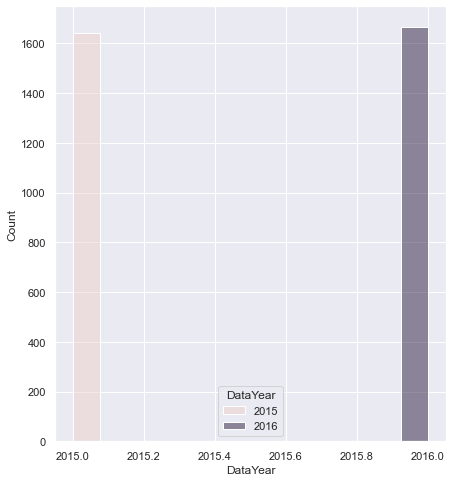

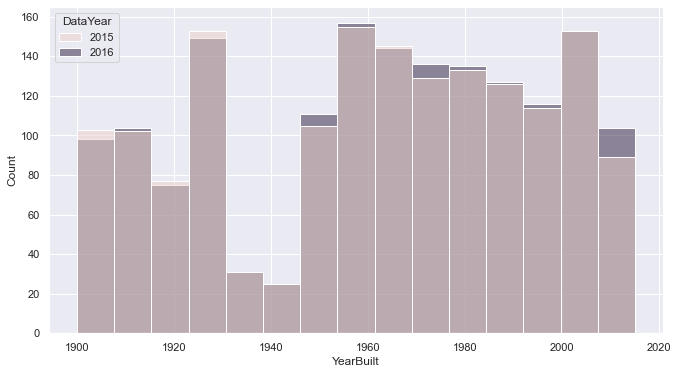

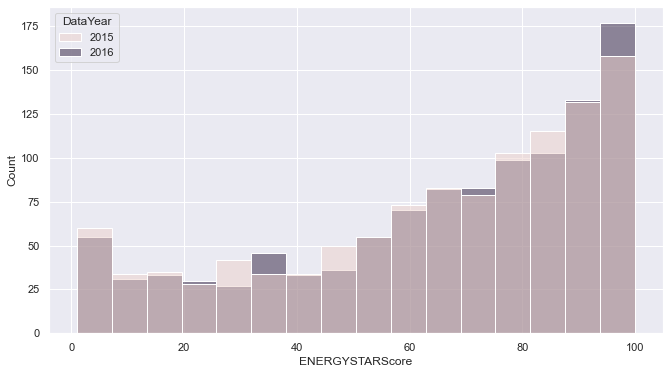

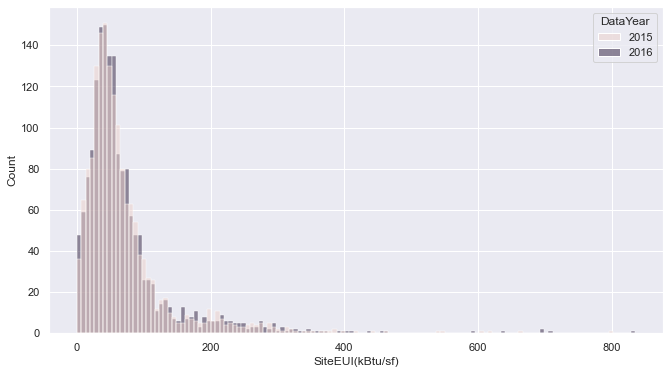

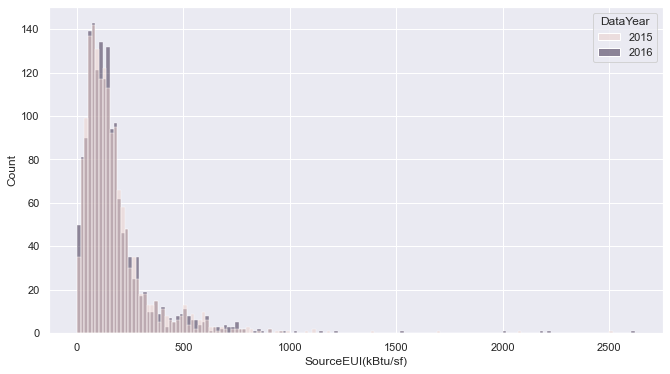

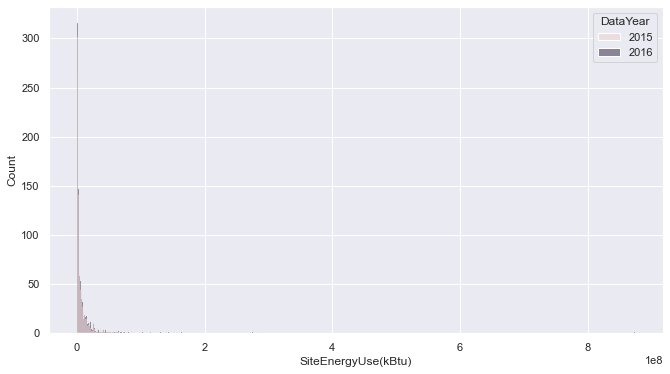

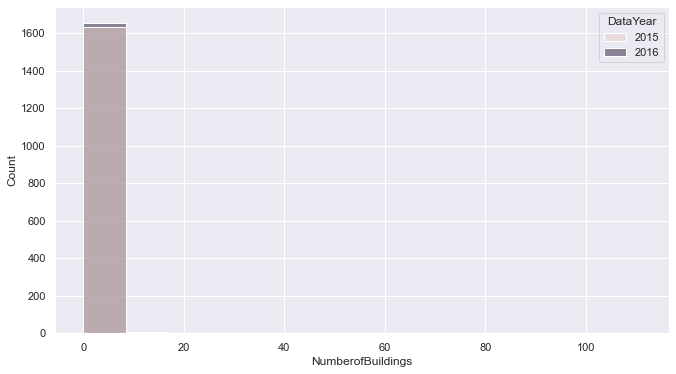

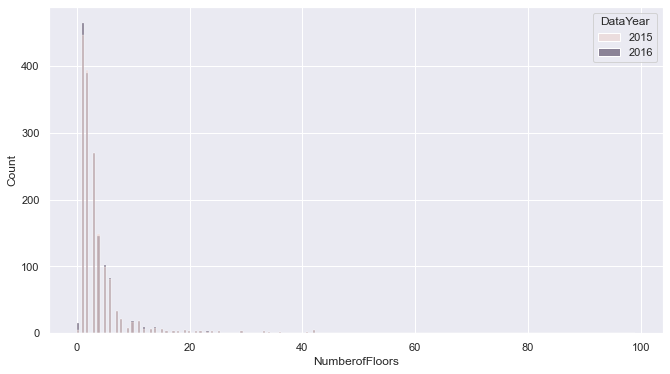

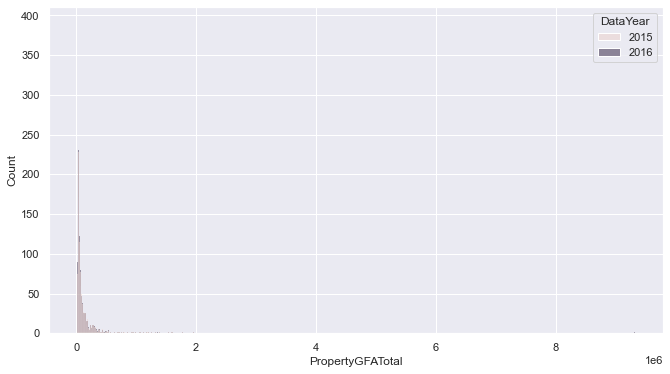

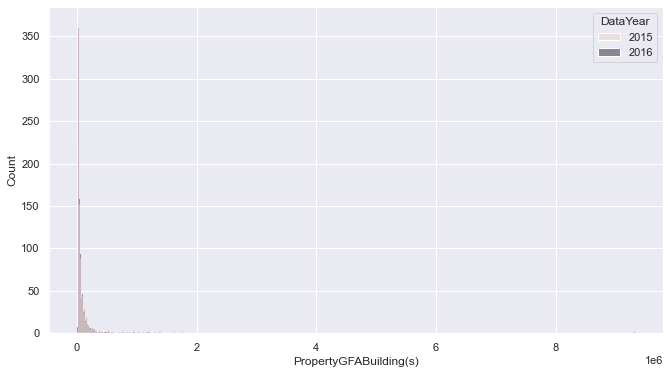

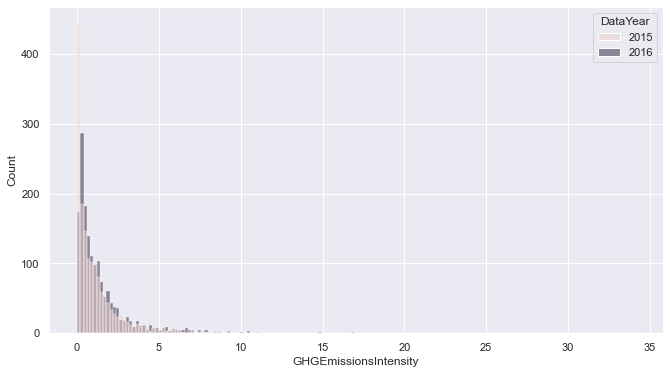

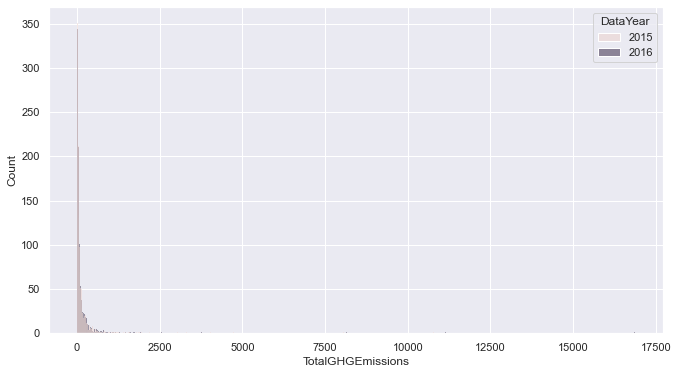

In [54]:
plt.subplots(figsize=(7, 8))

columns_to_drop_in_histogram=['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'OSEBuildingID', 'Latitude', 'Longitude', 'Address']

for i in new_df_both_years.columns:
    if i not in columns_to_drop_in_histogram:
        sns.histplot(data=new_df_both_years, x=i, color="cyan", hue="DataYear")
        plt.show()

In [55]:
# See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning
# import folium
# map_osm = folium.Map()
# map_osm = folium.Map(location=[new_df_both_years['Latitude'].mean(), new_df_both_years['Longitude'].mean()], zoom_start=11, width=1000, height=1000, control_scale=True)
# for i in range(0,len(new_df_both_years)):
#     folium.Circle([new_df_both_years.iloc[i]['Latitude'],new_df_both_years.iloc[i]['Longitude']], 
#                       popup=new_df_both_years.iloc[i]['Address'], radius =100, color='red').add_to(map_osm)
# map_osm

In [56]:
print("The data frame with more clean data contains {} rows and {} columns".format(new_df_both_years.shape[0],new_df_both_years.shape[1]))

The data frame with more clean data contains 3305 rows and 19 columns


### Pickling the cleaned data frame

In [57]:
# To pickle the data frame

new_df_both_years.to_pickle("./pickle_data_cleaned.pkl")

## Correlation analysis

### Correlation matrix

We will calculate the pairwise correlation between columns and return a correlation matrix. We used the corr() function with the Kendall correlation coefficient, which measures the monotonic relationship between two variables. It does not require the variables to be normally distributed. (See reference https://www.learnpythonwithrune.org/pandas-correlation-methods-explained-pearson-kendall-and-spearman/)

In [58]:
correlation_matrix = new_df_both_years.corr(method='kendall')

In [59]:
# print(correlation_matrix)

<AxesSubplot:>

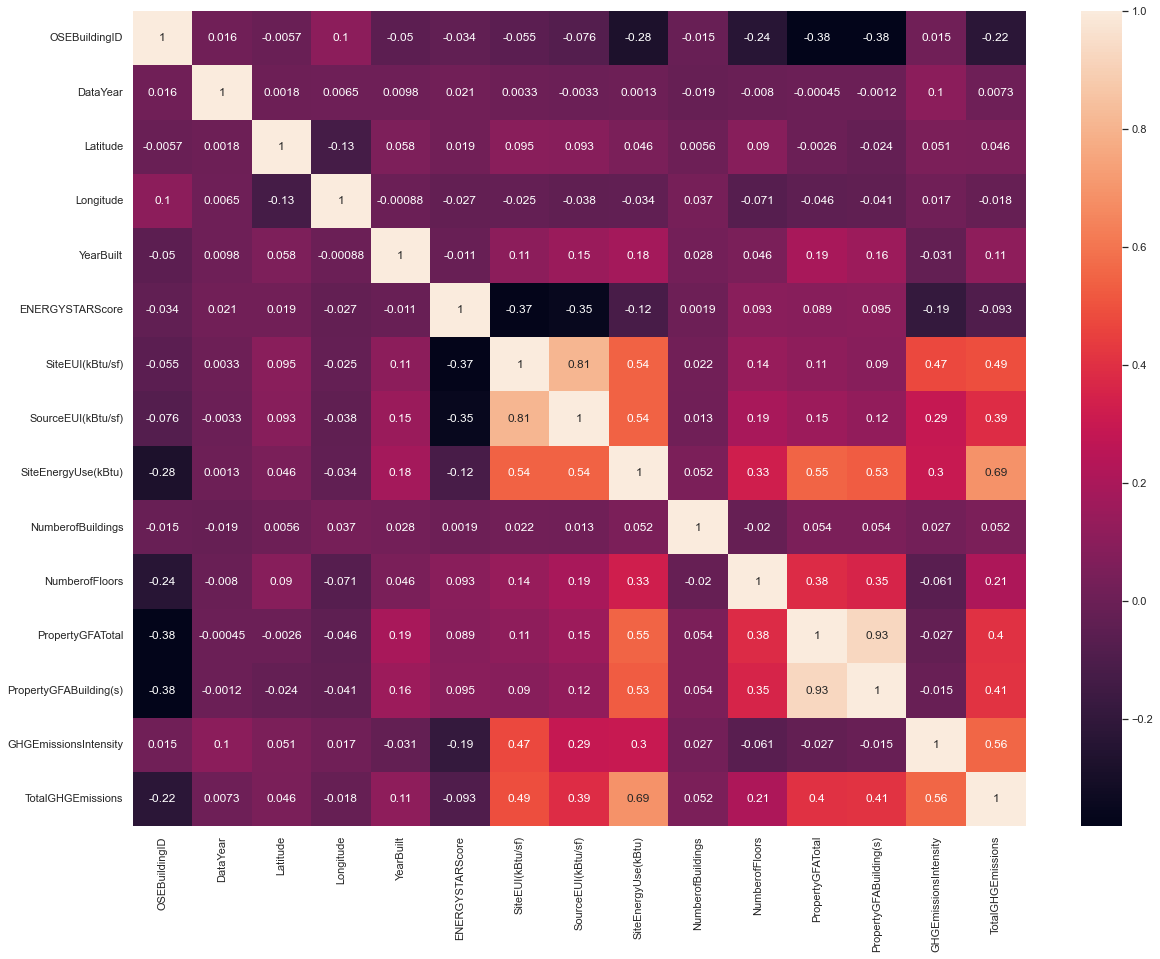

In [60]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=True)

The correlation matrix allows us to identify correlations between pairs of variables as we will see next.

In [61]:
# See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning

threshold = 0.7
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(correlation_pairs[(abs(correlation_pairs) > threshold)]).reset_index().rename(columns={0:'correlation_coefficients'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('correlation_coefficients', ascending=False)

,level_0,level_1,correlation_coefficients
2,PropertyGFABuilding(s),PropertyGFATotal,0.928091
0,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),0.807923


### Preparation of variables for prediction analysis with different algorithms

In [62]:
new_df_both_years.columns 

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'Latitude', 'Longitude', 'Address', 'Neighborhood', 'YearBuilt',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)', 'GHGEmissionsIntensity',
       'TotalGHGEmissions'],
      dtype='object')

In [63]:
subset_columns_for_analysis = [
                                # 'OSEBuildingID', # ID not needed
                                # 'DataYear', # Refered as 2015 or 2016
                                # 'BuildingType', # Residential or Non-residential (not needed)
                                'PrimaryPropertyType',
                                # 'Latitude', 'Longitude', 'Address', # Physical address and coordinates not needed
                                'Neighborhood', 
                                'YearBuilt', 
                                # 'ENERGYSTARScore', # More than 20% percent of missing data
                                'SiteEUI(kBtu/sf)', 
                                # 'SourceEUI(kBtu/sf)', # Highly correlated to 'SiteEUI(kBtu/sf)' (0.81)
                                'SiteEnergyUse(kBtu)',
                                # 'NumberofBuildings', 
                                'NumberofFloors', 
                                'PropertyGFATotal',
                                # 'PropertyGFABuilding(s)', # Highly correlated to 'PropertyGFATotal' (0.93)
                                'GHGEmissionsIntensity',
                                'TotalGHGEmissions' 
                            ]

In [64]:
subset_data_frame_for_analysis = new_df_both_years.copy()

In [65]:
new_data_frame_for_analysis = subset_data_frame_for_analysis[subset_columns_for_analysis]

In [66]:
new_data_frame_for_analysis.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofFloors,PropertyGFATotal,GHGEmissionsIntensity,TotalGHGEmissions
0,Hotel,DOWNTOWN,1927,78.9,6981428.0,12.0,88434,2.64,249.43
1,Hotel,DOWNTOWN,1996,94.4,8354235.0,11.0,103566,2.38,263.51
2,Hotel,DOWNTOWN,1969,96.6,73130656.0,41.0,961990,1.92,2061.48
3,Hotel,DOWNTOWN,1926,460.4,28229320.0,10.0,61320,31.38,1936.34
4,Hotel,DOWNTOWN,1980,120.1,14829099.0,18.0,119890,4.02,507.70


In [67]:
categorical_columns = ['PrimaryPropertyType', 'Neighborhood']

for i in new_data_frame_for_analysis.columns:
    if i not in categorical_columns:
        new_data_frame_for_analysis[i].fillna(new_data_frame_for_analysis[i].median(),inplace=True)

    else:
        new_data_frame_for_analysis[i].fillna('Unknown',inplace=True)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [68]:
new_data_frame_for_analysis = new_data_frame_for_analysis.astype({'PrimaryPropertyType': 'category', 'Neighborhood': 'category'})

In [69]:
columns_to_categorical = new_data_frame_for_analysis.select_dtypes(['category']).columns

In [70]:
new_data_frame_for_analysis[columns_to_categorical] = new_data_frame_for_analysis[columns_to_categorical].apply(lambda x: x.cat.codes)

In [71]:
print("The data frame with analysis variables contains {} rows and {} columns".format(new_data_frame_for_analysis.shape[0],new_data_frame_for_analysis.shape[1]))

The data frame with analysis variables contains 3305 rows and 9 columns


In [72]:
new_data_frame_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3305 entries, 0 to 6715
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PrimaryPropertyType    3305 non-null   int8   
 1   Neighborhood           3305 non-null   int8   
 2   YearBuilt              3305 non-null   int64  
 3   SiteEUI(kBtu/sf)       3305 non-null   float64
 4   SiteEnergyUse(kBtu)    3305 non-null   float64
 5   NumberofFloors         3305 non-null   float64
 6   PropertyGFATotal       3305 non-null   int64  
 7   GHGEmissionsIntensity  3305 non-null   float64
 8   TotalGHGEmissions      3305 non-null   float64
dtypes: float64(5), int64(2), int8(2)
memory usage: 342.1 KB


### Normalization and outliers detection

We are going to use Z-scores to detect outliers in our data. See references: 
* https://www.mygreatlearning.com/blog/outlier-analysis-explained/
* https://www.codecademy.com/article/normalization
* https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/

In [73]:
df_for_z_scores = new_data_frame_for_analysis.copy()

In [74]:
# standardize data
df_standardized = (df_for_z_scores - df_for_z_scores.mean()) / df_for_z_scores.std()

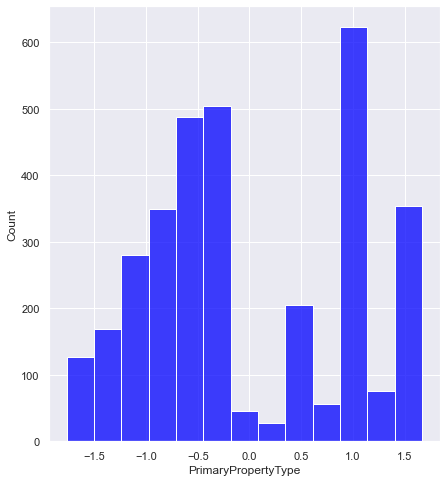

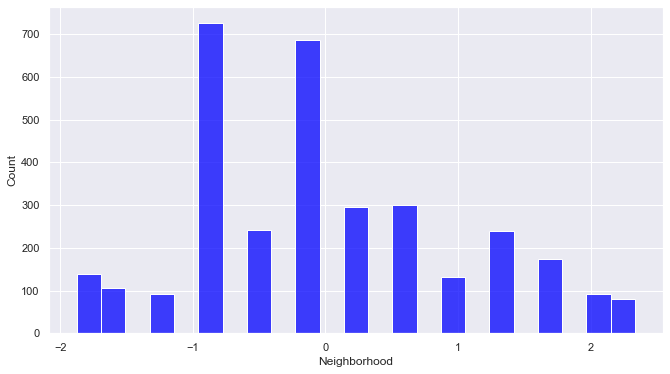

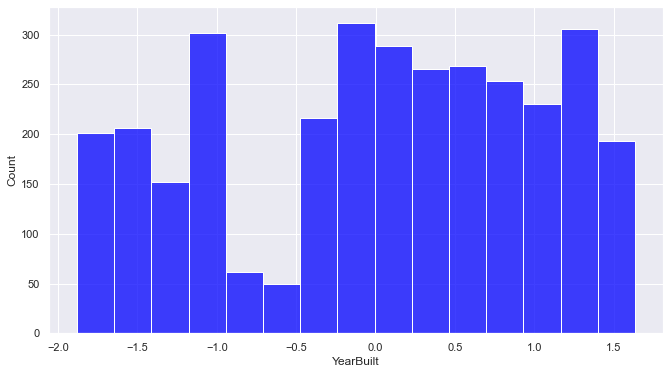

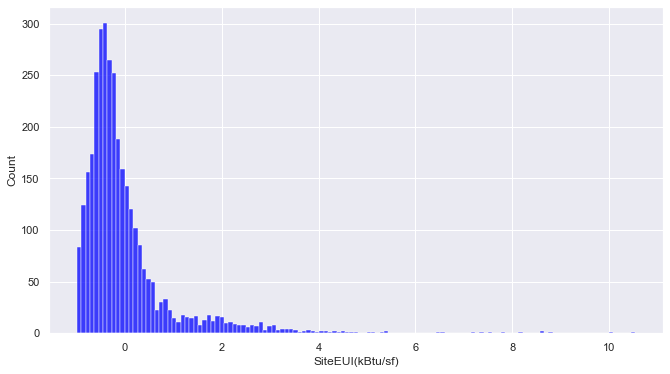

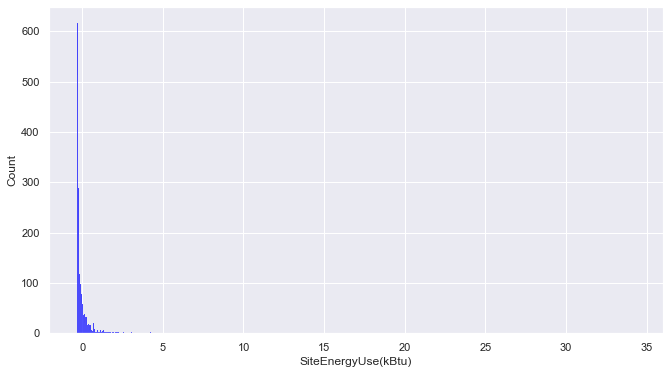

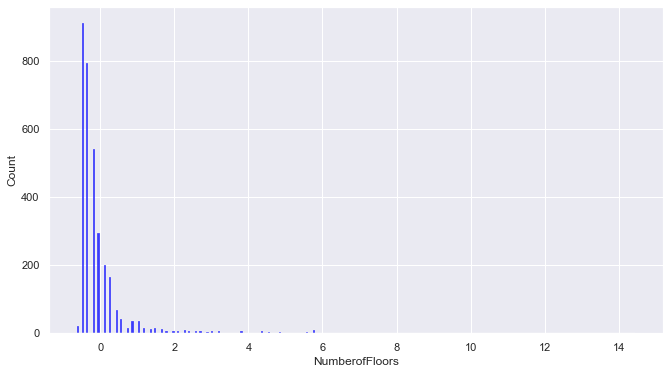

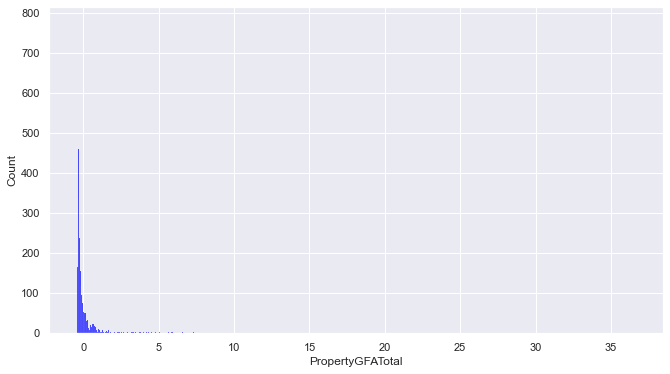

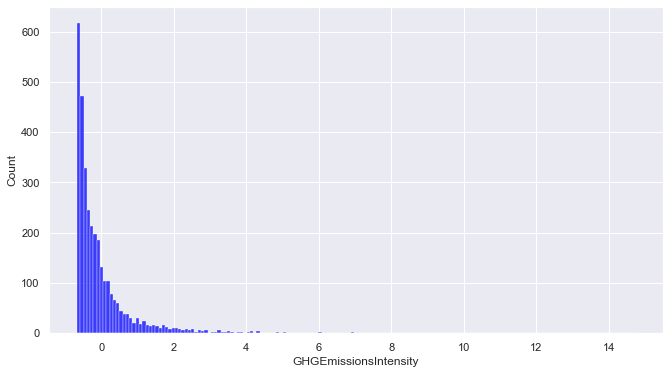

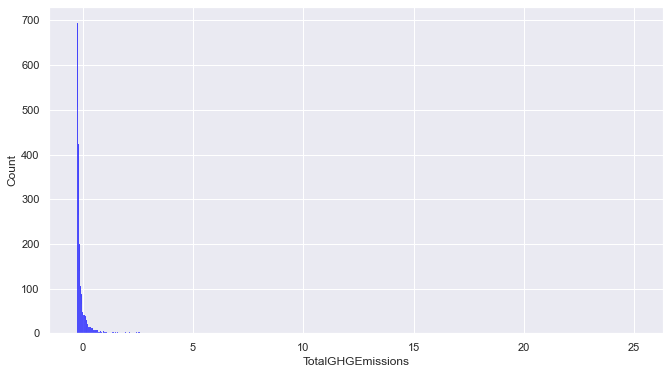

In [75]:
df_standardized.describe()
plt.subplots(figsize=(7, 8))
for i in df_standardized.columns:
    sns.histplot(data=df_standardized, x=i, color="blue")
    plt.show()

In [76]:
print("Standardized data frame contains {} rows and {} columns".format(df_standardized.shape[0],df_standardized.shape[1]))

Standardized data frame contains 3305 rows and 9 columns


We will remove outliers taking by considering a cut-off value of +/-2 of the Z-scores.

In [77]:
df_standardized_without_outliers = df_standardized.loc[
                                                    (df_standardized['SiteEUI(kBtu/sf)'] >= -2) & (df_standardized['SiteEUI(kBtu/sf)'] <= 2)
                                                    & (df_standardized['SiteEnergyUse(kBtu)'] >= -2) & (df_standardized['SiteEnergyUse(kBtu)'] <= 2)
                                                    & (df_standardized['NumberofFloors'] >= -2) & (df_standardized['NumberofFloors'] <= 2)
                                                    & (df_standardized['PropertyGFATotal'] >= -2) & (df_standardized['PropertyGFATotal'] <= 2)
                                                    & (df_standardized['GHGEmissionsIntensity'] >= -2) & (df_standardized['GHGEmissionsIntensity'] <= 2)
                                                    & (df_standardized['TotalGHGEmissions'] >= -2) & (df_standardized['TotalGHGEmissions'] <= 2)
                                                    ]

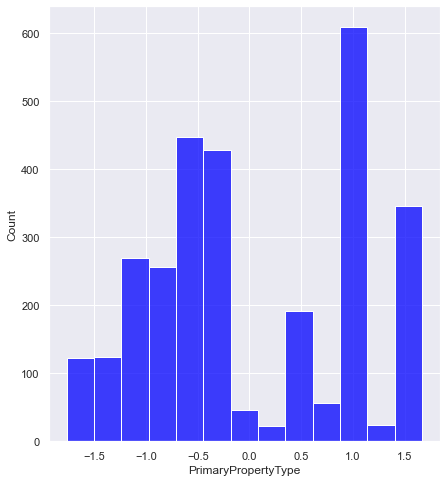

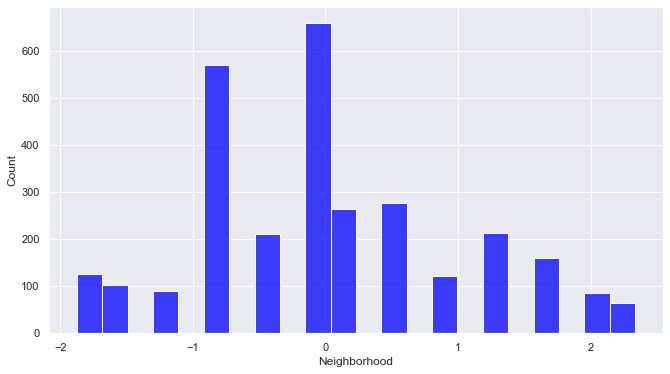

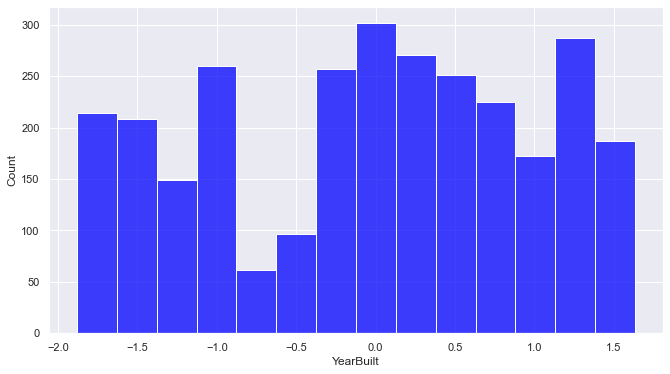

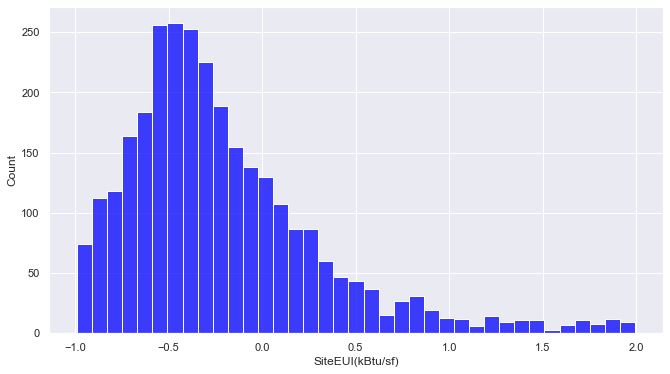

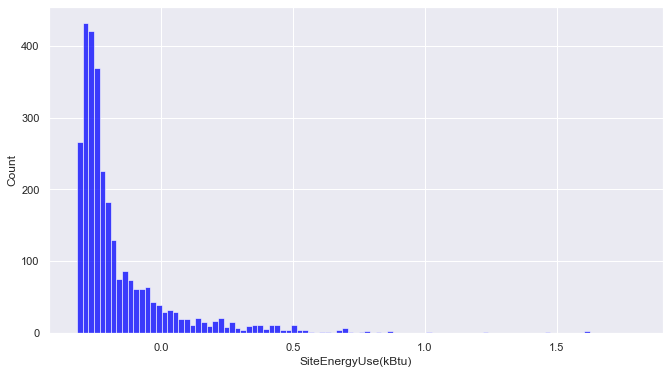

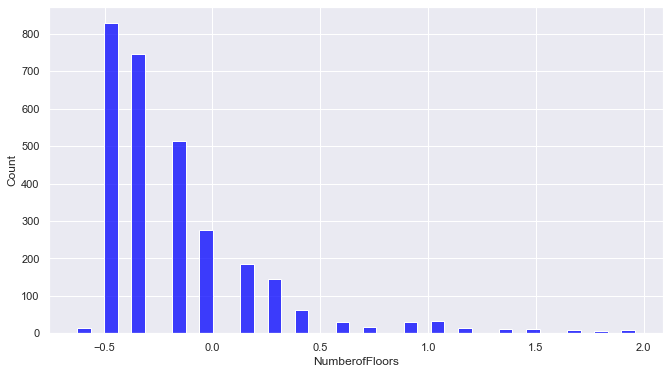

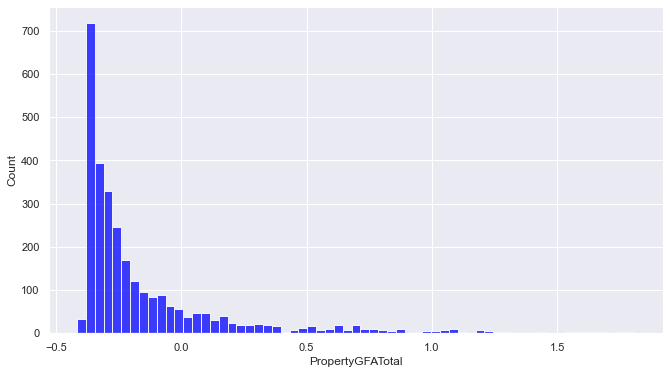

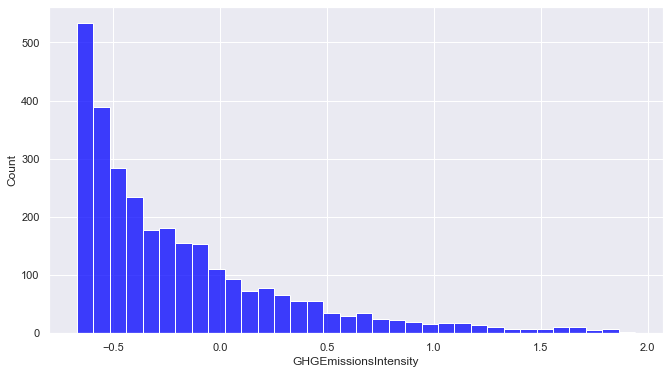

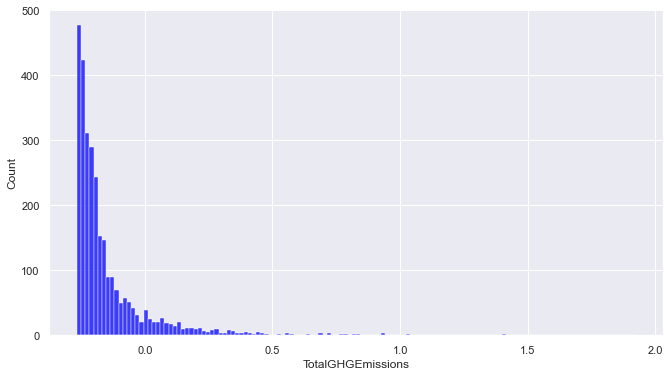

In [78]:
plt.subplots(figsize=(7, 8))
for i in df_standardized.columns:
    sns.histplot(data=df_standardized_without_outliers, x=i, color="blue")
    plt.show()

In [79]:
print("Standardized data frame without outliers contains {} rows and {} columns".format(df_standardized_without_outliers.shape[0],df_standardized_without_outliers.shape[1]))


Standardized data frame without outliers contains 2942 rows and 9 columns


## Prediction analysis

### Data splitting for training and test

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
def get_training_and_testing_data(data_frame, target_column):
    training_data, testing_data = train_test_split(data_frame, test_size=0.2, random_state=25) # Here we use 80% for traning and 20% for test
    X_training_data = training_data.drop(columns=[target_column])
    y_training_data = training_data[target_column]
    X_testing_data = testing_data.drop(columns=[target_column])
    y_testing_data = testing_data[target_column]

    return(X_training_data, y_training_data, X_testing_data, y_testing_data)

In [82]:
X_training, y_training, X_test, y_test = get_training_and_testing_data(df_standardized_without_outliers, 'TotalGHGEmissions')

In [83]:
print(f"No. of training examples: {X_training.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: 2353
No. of testing examples: 589


### Analysis using Linear Regression (Ordinary Least Squares)

We import the model of linear regression.

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

We will perform K-Fold Cross-Validation to evaluate the performance of the Linear Regression (Ordinary Least Squares) model. 

https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

https://www.statology.org/k-fold-cross-validation/

https://www.datasciencesmachinelearning.com/2018/11/train-test-split-and-cross-validation.html

In [85]:
#define predictor and response variables
# X = df_standardized_without_outliers.drop(columns=['TotalGHGEmissions'])
# y = df_standardized_without_outliers['TotalGHGEmissions']

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
lin_reg = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(lin_reg, X_training, y_training, scoring='r2', cv=cv)

R2 will be a measure of the proportion of the variance within the data sample that is explained by the model.

In [86]:
#view mean absolute error
print('Array of R2 for each k-fold: ', scores)
print('mean R2: ', np.mean(scores))
print('R2 std: ', np.std(scores))

Array of R2 for each k-fold:  [0.79999376 0.82376402 0.84742576 0.8285238  0.87859074 0.86108212
 0.7989175  0.87482325 0.89440296 0.82554749]
mean R2:  0.8433071400084341
R2 std:  0.031534533545678194


High values of R2 in the different k-folds is an indication of a good performance of the model. In order to train and test the linear regression model, we fit the training data set.

In [87]:
lin_reg = LinearRegression().fit(X_training, y_training)

Since the linear regression model is now trained, we can see its performance in the test data subset. For this, we can compare now the R2 values between the training and test data subsets. Within the testing data, R2 gives information about the predictive quality of the model.

In [88]:
# Consult reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

print('Train Score: ', lin_reg.score(X_training, y_training))
print('Test Score: ', lin_reg.score(X_test, y_test)) # y_test corresponds to the known (real) values to predict the target column values

Train Score:  0.8534439328664566
Test Score:  0.8114286164277561


R2 value in the testing data subset suggests that our regressive model has well fitted to the unseen data. We will now test de model and we will predict the target column using the linear model with the testing data set. We will asign the prediction probabilities values to the variable y_GHG_emissions_linear_model.

In [89]:
# X_test is the set that is going to be passed to the model. Here we calculate prediction probabilities.
y_GHG_emissions_linear_model = lin_reg.predict(X_test)

We will now compare the linear model prediction against reality. For this we will use Mean Square Error (MSE) and Mean Absolute Error (MAE). 
Consult reference https://www.dataquest.io/blog/understanding-regression-error-metrics/

In [90]:
from sklearn.metrics import mean_squared_error

# Mean squared error. See reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

# mean_squared_error(y_true, y_pred)

print("Percentage of mean squared error for the classic linear regression model is:")
(mean_squared_error(y_test, y_GHG_emissions_linear_model))*100

Percentage of mean squared error for the classic linear regression model is:


0.7216512642389351

In [91]:
from sklearn.metrics import mean_absolute_error

# Mean absolute error. See reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

# mean_absolute_error(y_true, y_pred)

print("Percentage of mean absolute error for the classic linear regression model is:")
(mean_absolute_error(y_test, y_GHG_emissions_linear_model))*100

Percentage of mean absolute error for the classic linear regression model is:


4.501651639824513

We will now create a data frame that will contain real and predicted target column values.

In [92]:
real_and_predicted_values_classic_linear_regression_df = pd.DataFrame()

In [93]:
real_and_predicted_values_classic_linear_regression_df['TotalGHGEmissions_real_values'] = y_test

In [94]:
real_and_predicted_values_classic_linear_regression_df.head()

,TotalGHGEmissions_real_values
6253,-0.208860
1989,-0.225926
3838,-0.233754
5858,-0.084553
6474,-0.222537


In [95]:
real_and_predicted_values_classic_linear_regression_df['TotalGHGEmissions_predicted_values_linear_model'] = y_GHG_emissions_linear_model

In [96]:
real_and_predicted_values_classic_linear_regression_df.head()

,TotalGHGEmissions_real_values,TotalGHGEmissions_predicted_values_linear_model
6253,-0.208860,-0.238035
1989,-0.225926,-0.330803
3838,-0.233754,-0.232517
5858,-0.084553,0.176556
6474,-0.222537,-0.204996


We will now plot the real and the predicted values of the target column that corresponds to the Total Green House Gas Emissions from the classic linear regression model.

<AxesSubplot:xlabel='TotalGHGEmissions_real_values', ylabel='TotalGHGEmissions_predicted_values_linear_model'>

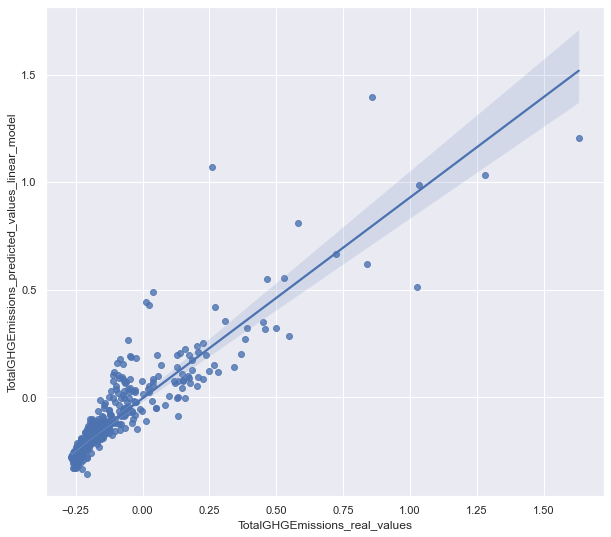

In [97]:
# https://seaborn.pydata.org/tutorial/regression.html

plt.subplots(figsize=(10, 9))
sns.regplot(x="TotalGHGEmissions_real_values", y="TotalGHGEmissions_predicted_values_linear_model", data=real_and_predicted_values_classic_linear_regression_df)

In [98]:
real_and_predicted_values_classic_linear_regression_df = real_and_predicted_values_classic_linear_regression_df.sort_values(by=['TotalGHGEmissions_real_values'])

In [99]:
list_y_GHG_emissions_size = [i for i in range(len(real_and_predicted_values_classic_linear_regression_df))]

In [100]:
real_and_predicted_values_classic_linear_regression_df['x_values_for_visualization'] = list_y_GHG_emissions_size

In [101]:
real_and_predicted_values_classic_linear_regression_df.head()

,TotalGHGEmissions_real_values,TotalGHGEmissions_predicted_values_linear_model,x_values_for_visualization
5529,-0.265622,-0.275219,0
2212,-0.265622,-0.275208,1
1522,-0.264842,-0.269413,2
2229,-0.264812,-0.272772,3
6141,-0.264707,-0.270660,4


<AxesSubplot:xlabel='x_values_for_visualization', ylabel='TotalGHGEmissions_real_values'>

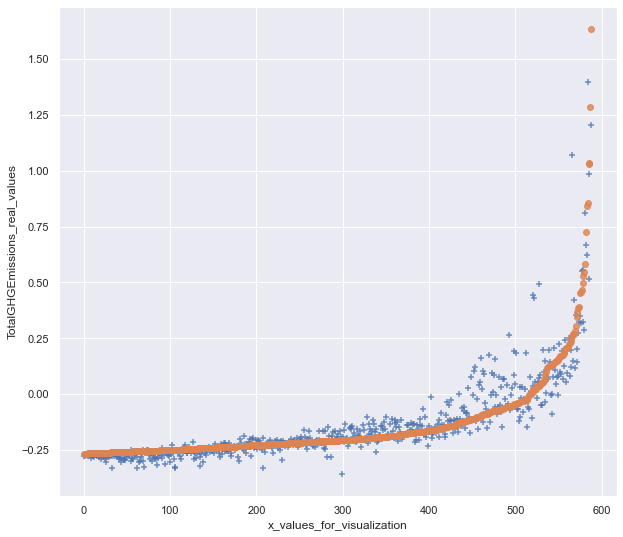

In [102]:
plt.subplots(figsize=(10, 9))
sns.regplot(x="x_values_for_visualization", y="TotalGHGEmissions_predicted_values_linear_model", data=real_and_predicted_values_classic_linear_regression_df, fit_reg=False, marker='+')
sns.regplot(x="x_values_for_visualization", y="TotalGHGEmissions_real_values", data=real_and_predicted_values_classic_linear_regression_df, fit_reg=False)


As linear regression has no parameters, there is no way to control the complexity of the model. We’ll explore some variations that add regularization below.

https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

As linear regression has no parameters, there is no way to control the complexity of the model. For this, we’ll add regularization.

https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

### Ridge Regression (L2 Regularization)

Ridge regression imposes a penalty on the size of the coefficents. Here we want the magnitude of the coefficients to be minimized so that each feature has as little effect on the outcome as possible. See reference:

https://github.com/terrah27/ml_guides/blob/main/linear_models_regression.ipynb

In [269]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

We start by performing a cross validation for the Ridge regression by following the example in reference: 
https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308246-tp-selectionnez-le-nombre-de-voisins-dans-un-knn

Our next goal is to create the parameter grid for searching the hyperparameters of the Ridge regression that are going to be optimized. Then we select the score metric to evaluate the model. We then set the number of folds for the cross validation and we select the model, which in this case is Ridge Regression (L2 Regularization).

In [301]:
# Create the parameter grid based on the results of random search
parameter_grid = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Number of folds of crossed validation
n_cv = 10

# Selects a score to optimize. Here R2.
score = 'r2'

# creates a model
model_selected = linear_model.Ridge()

We create a function that will use the "GridSearchCV" method to cross-validate the alpha parameter of the a Ridge or Lasso Regression on the training set. Such function will also provide values of the models performance via the R2 score and the prediction errors such as MSE and MAE.

In [312]:
def create_and_optimize_model(model_selected, parameter_grid, n_cv, score):

    model_optimized_via_grid_search = model_selection.GridSearchCV(
                                model_selected,                     # Model to fit
                                param_grid = parameter_grid,        # Hyperparameters to test
                                cv = n_cv,                          # Number of folds of crossed validation
                                scoring = score                     # score to optimize
                                )

    # Optimizes the Ridge regression with the training data
    model_optimized_via_grid_search.fit(X_training, y_training)

    # # Shows the best optimized hyperparameters
    print("Best hyperparametre in the training data:")
    print(model_optimized_via_grid_search.best_params_)

    # Shows the corresponding performances
    print("Cross validation results:")
    for mean, std, params in zip(
                                model_optimized_via_grid_search.cv_results_['mean_test_score'], # mean score
                                model_optimized_via_grid_search.cv_results_['std_test_score'],  # score standard deviation
                                model_optimized_via_grid_search.cv_results_['params']           # hyperparameter value
                                ):

        print("{} = {:.3f} (+/-{:.03f}) for {}".format(
                                                        score,
                                                        mean,
                                                        std*2,
                                                        params
                                                    ))

    ''' We use the optimized trained model obtained from the cross validation process to compare predicted and real values. 
    We will asign the prediction probabilities values to the variable y_GHG_emissions_pred'''
    
    # X_test is the set that is going to be passed to the model. Here we calculate prediction probabilities.
    y_GHG_emissions_pred = model_optimized_via_grid_search.predict(X_test)

    '''We will now obtain the score R2 of the regression'''

    print("The coefficient of determination of the prediction of the model, R2, is equal to: {}".format
                                                (model_optimized_via_grid_search.score(X_test, y_test))) 
                                                # y_test corresponds to the known (real) values to predict the target column values

    print("Percentage of mean squared error for the model is: {}".format
                                                ((mean_squared_error(y_test, y_GHG_emissions_pred))*100))

    print("Percentage of mean absolute error for the model is: {}".format
                                                ((mean_absolute_error(y_test, y_GHG_emissions_pred))*100))
    
    


In [313]:
create_and_optimize_model(model_selected, parameter_grid, n_cv, score)

Best hyperparametre in the training data:
{'alpha': 1}
Cross validation results:
r2 = 0.836 (+/-0.090) for {'alpha': 1e-07}
r2 = 0.836 (+/-0.090) for {'alpha': 1e-06}
r2 = 0.836 (+/-0.090) for {'alpha': 1e-05}
r2 = 0.836 (+/-0.090) for {'alpha': 0.0001}
r2 = 0.836 (+/-0.090) for {'alpha': 0.001}
r2 = 0.836 (+/-0.090) for {'alpha': 0.01}
r2 = 0.836 (+/-0.089) for {'alpha': 0.1}
r2 = 0.837 (+/-0.086) for {'alpha': 1}
r2 = 0.825 (+/-0.078) for {'alpha': 10}
The coefficient of determination of the prediction of the model, R2, is equal to: 0.8159236844341206
Percentage of mean squared error for the model is: 0.7044489112191828
Percentage of mean absolute error for the model is: 4.49703798751118


### Lasso Regression (L1 Regularization)

Lasso regression uses L1 regularization to force some coefficents to be exactly zero which means they are ignored by the model. This can be used as a type of feature selection! Lasso can make the model easier to interpret and reveal the most important features.

In [155]:
from sklearn.linear_model import Lasso

from sklearn import linear_model

We will perform a cross validation for the Lasso regression to optimize the hyperparameters and the model, by executing the create_and_optimize_model() function.

We create the parameter grid for searching the hyperparameters of the Lasso regression that are going to be optimized. Then we select the score metric to evaluate the model and the model.

In [314]:
# Create the parameter grid based on the results of random search
parameter_grid = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Number of folds of crossed validation
n_cv = 10

# Selects a score to optimize. Here R2.
score = 'r2'

# creates a model
model_selected = linear_model.Lasso()

In [315]:
create_and_optimize_model(model_selected, parameter_grid, n_cv, score)

Best hyperparametre in the training data:
{'alpha': 0.001}
Cross validation results:
r2 = 0.836 (+/-0.090) for {'alpha': 1e-07}
r2 = 0.836 (+/-0.090) for {'alpha': 1e-06}
r2 = 0.836 (+/-0.090) for {'alpha': 1e-05}
r2 = 0.837 (+/-0.088) for {'alpha': 0.0001}
r2 = 0.837 (+/-0.076) for {'alpha': 0.001}
r2 = 0.767 (+/-0.053) for {'alpha': 0.01}
r2 = -0.012 (+/-0.021) for {'alpha': 0.1}
r2 = -0.012 (+/-0.021) for {'alpha': 1}
r2 = -0.012 (+/-0.021) for {'alpha': 10}
The coefficient of determination of the prediction of the model, R2, is equal to: 0.8212906669320782
Percentage of mean squared error for the model is: 0.6839097942469857
Percentage of mean absolute error for the model is: 4.399423139607004


### Analysis using a random forest regresson

We import the model of random forest for regression.

In [138]:
from sklearn import model_selection

from sklearn.ensemble import RandomForestRegressor

We start by performing cross validation by following the example in reference: 

https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308246-tp-selectionnez-le-nombre-de-voisins-dans-un-knn

We create the parameter grid for searching the hyperparameters of the random forest regressor that are going to be optimized. Then we select the score metric to evaluate the model. In this case, R2. See reference:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

https://odsc.medium.com/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead

In [139]:
# Create the parameter grid based on the results of random search 
param_grid = {
            'max_depth': [5,10,20],
            'n_estimators': [20,50,100]
}

# Selects a score to optimize. Here R2.
score = 'r2'

We will now use the "GridSearchCV" method to cross-validate the parameter grid of the random forest regressor on the training set:

In [140]:
# Creates a Random Forest Regressor with hyperparameters search with crossed validation
rfr = model_selection.GridSearchCV(
                                            RandomForestRegressor(), # Random Forest Regressor
                                            param_grid,      # Hyperparameters to test
                                            cv=5,            # Number of folds of crossed validation
                                            scoring=score    # score to optimize
                                        )

# Optimizes the Random Forest Regressor with the training data
rfr.fit(X_training, y_training)

# Shows the best optimized hyperparameters
print("Best hyperparametre in the training data:")
print(rfr.best_params_)

Best hyperparametre in the training data:
{'max_depth': 10, 'n_estimators': 100}


We will print the cross validation results.

In [141]:
# Shows the corresponding performances
print("Cross validation results:")
for mean, std, params in zip(
                            rfr.cv_results_['mean_test_score'], # mean score
                            rfr.cv_results_['std_test_score'],  # score standard deviation
                            rfr.cv_results_['params']           # hyperparameter value
                            ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
                                                    score,
                                                    mean,
                                                    std*2,
                                                    params
                                                ))

Cross validation results:
r2 = 0.922 (+/-0.034) for {'max_depth': 5, 'n_estimators': 20}
r2 = 0.923 (+/-0.029) for {'max_depth': 5, 'n_estimators': 50}
r2 = 0.925 (+/-0.031) for {'max_depth': 5, 'n_estimators': 100}
r2 = 0.959 (+/-0.024) for {'max_depth': 10, 'n_estimators': 20}
r2 = 0.958 (+/-0.028) for {'max_depth': 10, 'n_estimators': 50}
r2 = 0.961 (+/-0.027) for {'max_depth': 10, 'n_estimators': 100}
r2 = 0.955 (+/-0.028) for {'max_depth': 20, 'n_estimators': 20}
r2 = 0.958 (+/-0.032) for {'max_depth': 20, 'n_estimators': 50}
r2 = 0.958 (+/-0.031) for {'max_depth': 20, 'n_estimators': 100}


We use the optimized trained model obtained from the cross validation process to compare predicted and real values. We will asign the prediction probabilities values to the variable y_GHG_emissions_random_forest.

In [142]:
# X_test is the set that is going to be passed to the model. Here we calculate prediction probabilities.
y_GHG_emissions_random_forest = rfr.predict(X_test)

We will now obtain the score R2 of the regression using random forest model via the score() method. R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable or independent variables in a regression model.

In [143]:
print("The coefficient of determination of the prediction of the random forest model, R2, is equal to:")
rfr.score(X_test, y_test) # y_test corresponds to the known (real) values to predict the target column values

The coefficient of determination of the prediction of the random forest model, R2, is equal to:


0.9552470207228613

The higher accuracy score of the model suggests that our random forest regression model fits better the existing data than classic linear regresion model. 

We will now compare the regresion random forest model prediction against reality. For this we will use Mean Square Error (MSE) and Mean Absolute Error (MAE). 
Consult reference https://www.dataquest.io/blog/understanding-regression-error-metrics/

In [144]:
# Mean squared error. See reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

# mean_squared_error(y_true, y_pred)

print("Percentage of mean squared error for the random forest regression model is:")
(mean_squared_error(y_test, y_GHG_emissions_random_forest))*100

Percentage of mean squared error for the random forest regression model is:


0.17126694126117528

In [145]:
# Mean absolute error. See reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

# mean_absolute_error(y_true, y_pred)

print("Percentage of mean absolute error for the random forest model is:")
(mean_absolute_error(y_test, y_GHG_emissions_random_forest))*100

Percentage of mean absolute error for the random forest model is:


1.4550084737263014

We will now create a data frame that will contain real and predicted target column values.

In [146]:
real_and_predicted_values_random_forest_df = pd.DataFrame()

In [147]:
real_and_predicted_values_random_forest_df['TotalGHGEmissions_real_values'] = y_test
real_and_predicted_values_random_forest_df.head()

,TotalGHGEmissions_real_values
6253,-0.208860
1989,-0.225926
3838,-0.233754
5858,-0.084553
6474,-0.222537


In [148]:
real_and_predicted_values_random_forest_df['TotalGHGEmissions_predicted_values_random_forest_model'] = y_GHG_emissions_random_forest
real_and_predicted_values_random_forest_df.head()

,TotalGHGEmissions_real_values,TotalGHGEmissions_predicted_values_random_forest_model
6253,-0.208860,-0.185306
1989,-0.225926,-0.222751
3838,-0.233754,-0.230310
5858,-0.084553,-0.095093
6474,-0.222537,-0.220278


We will now plot the real and the predicted values of the target column that corresponds to the Total Green House Gas Emissions using the random forest regression.

<AxesSubplot:xlabel='TotalGHGEmissions_real_values', ylabel='TotalGHGEmissions_predicted_values_random_forest_model'>

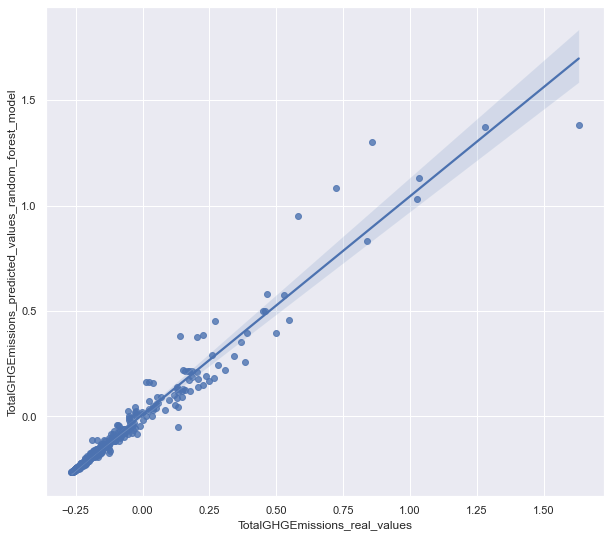

In [149]:
# https://seaborn.pydata.org/tutorial/regression.html
plt.subplots(figsize=(10, 9))
sns.regplot(x="TotalGHGEmissions_real_values", y="TotalGHGEmissions_predicted_values_random_forest_model", data=real_and_predicted_values_random_forest_df)

In [150]:
real_and_predicted_values_random_forest_df = real_and_predicted_values_random_forest_df.sort_values(by=['TotalGHGEmissions_real_values'])

In [151]:
list_y_GHG_emissions_size = [i for i in range(len(real_and_predicted_values_random_forest_df))]

In [152]:
real_and_predicted_values_random_forest_df['x_values_for_visualization'] = list_y_GHG_emissions_size

In [153]:
real_and_predicted_values_random_forest_df.head()

,TotalGHGEmissions_real_values,TotalGHGEmissions_predicted_values_random_forest_model,x_values_for_visualization
5529,-0.265622,-0.264936,0
2212,-0.265622,-0.264936,1
1522,-0.264842,-0.264724,2
2229,-0.264812,-0.264724,3
6141,-0.264707,-0.264554,4


<AxesSubplot:xlabel='x_values_for_visualization', ylabel='TotalGHGEmissions_real_values'>

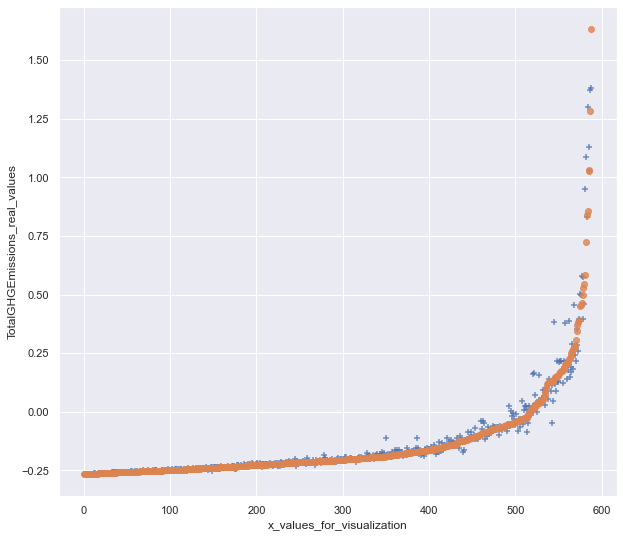

In [154]:
plt.subplots(figsize=(10, 9))
sns.regplot(x="x_values_for_visualization", y="TotalGHGEmissions_predicted_values_random_forest_model", data=real_and_predicted_values_random_forest_df, fit_reg=False, marker='+')
sns.regplot(x="x_values_for_visualization", y="TotalGHGEmissions_real_values", data=real_and_predicted_values_random_forest_df, fit_reg=False)
